<div class="clearfix" style="padding: 10px; padding-left: 0px">
<a href="http://bombora.com"><img src="https://app.box.com/shared/static/e0j9v1xjmubit0inthhgv3llwnoansjp.png" width="200px" class="pull-right" style="display: inline-block; margin: 5px; vertical-align: middle;"></a>
<h1> Bombora Data Science: <br> *Interview Exam* </h1>
</div>

<img width="200px" src="https://app.box.com/shared/static/15slg1mvjd1zldbg3xkj9picjkmhzpa5.png">

---
# Welcome

Welcome! This notebook contains interview exam questions referenced in the *Instructions* section in the `README.md`—please read that first, *before* attempting to answer questions here.

<div class="alert alert-info" role="alert" style="margin: 10px">
<p style="font-weight:bold">ADVICE</p>
<p>*Do not* read these questions, and panic, *before* reading the instructions in `README.md`.</p>
</div>

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p style="font-weight:bold">WARNING</p>

<p>If using <a href="https://try.jupyter.org">try.jupyter.org</a> do not rely on the server for anything you want to last - your server will be <span style="font-weight:bold">deleted after 10 minutes of inactivity</span>. Save often and rember download notebook when you step away (you can always re-upload and start again)!</p>
</div>


## Have fun!

Regardless of outcome, getting to know you is important. Give it your best shot and we'll look forward to following up!

# Exam Questions

## 1. Algo + Data Structures

### Q 1.1: Fibionacci
![fib image](https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/Fibonacci_spiral_34.svg/200px-Fibonacci_spiral_34.svg.png)

#### Q 1.1.1
Given $n$ where $n \in \mathbb{N}$ (i.e., $n$ is an integer and $n > 0$), write a function `fibonacci(n)` that computes the Fibonacci number $F_n$, where $F_n$ is defined by the recurrence relation:

$$ F_n = F_{n-1} + F_{n-2}$$

with initial conditions of:

$$ F_1 = 1,  F_2 = 1$$

In [20]:
def fibonacci(n):
    a=1
    b=1
    for i in range(3,n+1):
        c=a+b
        a,b=b,c
    return b

In [21]:
for i in range(1,10):
    print(fibonacci(i))

1
1
2
3
5
8
13
21
34


#### Q 1.1.2
What's the complexity of your implementation?

Time Complexity: **O(n)**  
Space Complexity: **O(1)**

#### Q 1.1.3
Consider an alternative implementation to compute Fibonacci number $F_n$ and write a new function, `fibonacci2(n)`.

In [23]:
def fibonacci2(n):
    k=math.sqrt(5)
    tmp=((1+k)/2)**(n+1)-((1-k)/2)**(n+1)
    return int(tmp/k)

In [24]:
for i in range(1,10):
    print(fibonacci(i))

1
1
2
3
5
8
13
21
34


#### Q 1.1.4
What's the complexity of your implementation?

Time Complexity: **O(logn)**  
Space Complexity: **O(1)**

#### Q 1.1.5
What are some examples of optimizations that could improve computational performance?


Time: instead of looping through n numbers, I try to find $n^{th}$ fibonacci number using math formula:
$$
F=1/\sqrt5[(\frac{1+\sqrt5}{2})^n-(\frac{1-\sqrt5}{2})^n]
$$
So when it comes to pow method, we can have $log_n$ time complexity.

### Q 1.2: Linked List
![ll img](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Singly-linked-list.svg/500px-Singly-linked-list.svg.png)

#### Q 1.2.1
Consider a [singly linked list](https://en.wikipedia.org/wiki/Linked_list), $L$. Write a function `is_palindrome(L)` that detects if $L$ is a [palindrome](https://en.wikipedia.org/wiki/Palindrome), by returning a bool, `True` or `False`.


In [25]:
def is_palindrome(L):
    cur=L
    res=[]
    while cur:
        res.append(cur.val)
        cur=cur.next
    return res==res[::-1]

In [29]:
class LinkedList:
    def __init__(self,val):
        self.val=val
        self.next=None

In [32]:
# example 1
arr1=[1,2,3,2,1]
L1=LinkedList(arr1[0])
cur=L1
for i in range(1,len(arr1)):
    cur.next=LinkedList(arr1[i])
    cur=cur.next
    
# check ispalindrome
print(is_palindrome(L1))

True


In [68]:
# example 1
arr1=[1,2,3,1]
L2=LinkedList(arr1[0])
cur=L2
for i in range(1,len(arr1)):
    cur.next=LinkedList(arr1[i])
    cur=cur.next
    
# check ispalindrome
print(is_palindrome(L2))

False


#### Q 1.2.2
What is the complexity of your implementation?

Suppose n is the length of linked list:  
Time Complexity: **O(n)**  
Space Complexity: **O(n)**

#### Q 1.2.3
Consider an alternative implementation to detect if L is a palindrome and write a new function, `is_palindrome2(L)`.

In [81]:
def is_palindrome2(L):
    
    # find the middle point and reverse it
    if not L: return True
    fast,slow=L,L
    while fast.next and fast.next.next:
        slow=slow.next
        fast=fast.next.next
        
    # reverse the second part
    prev=None
    cur=slow.next
    while cur:
        tmp=cur.next
        cur.next=prev
        prev=cur
        cur=tmp

    h1=L
    h2=prev
    result=True
    while result and h2:
        if h1.val!=h2.val:
            result=False
        h1=h1.next
        h2=h2.next
    return result

In [82]:
print(is_palindrome2(L1))
print(is_palindrome2(L2))

False
False


#### Q 1.2.4
What's the complexity of this implementation?


Suppose n is the length of linked list:  
Time Complexity: **O(n)**  
Space Complexity: **O(1)**

#### Q 1.2.5 
What are some examples of optimizations that could improve computational performance?


Space: instead of using a result array to store all the values in single linked list, I reverse the second half of linked list and check whether the first half is the same with the second half. 

## 2. Prob + Stats

### Q 2.1: Finding $\pi$ in a random uniform?
![pi pie img](http://core2.staticworld.net/images/article/2016/03/pi-day-intro-100649273-carousel.idge.jpeg)

Given a uniform random generator $[0,1)$ (e.g., use your language's standard libary to generate random value), write a a function `compute_pi` to compute [$\pi$](https://en.wikipedia.org/wiki/Pi).

In [108]:
import random
import math

def compute_pi():
    # using Mento Carlo
    a,b=0,0
    for i in range(100000):
        x=random.uniform(0,1)
        y=random.uniform(0,1)
        dist=math.sqrt(x**2+y**2)
        if dist<=1:
            a+=1
        b+=1
        pi=4*a/b
    return pi

In [109]:
for i in range(5):
    print(compute_pi())

3.13936
3.14788
3.14168
3.1356
3.14568


### Q 2.2: Making a 6-side die roll a 7?

![reno die image](http://thumbs.ebaystatic.com/images/g/IQ8AAOSwvzRXyagD/s-l225.jpg)

Using a single 6-side die, how can you generate a random number between 1 - 7?

Roll the die twice and track the two results:  
(1,1), (1,2), (1,3),...(6,6)   
If we have (6,6), we just re-roll the die twice again until non (6,6).  
So we can have 35 equally likely outcomes, and we label each result (x,y) using 6(x-1)+y. For example, (1,1) --> 1, (3,5) --> 17.   
So after rolling the die twice, we can get the lable n and we divide it by 7. We can have the remainder which is between 0 and 6.    
According to the remainder, we can have this remainder+1 as a random number between 1-7.

In [120]:
def random_number7(n):
    res=[0]*8
    for i in range(n):
        x=random.randint(1,6)
        y=random.randint(1,6)
        result=((x-1)*6+y)%7+1
        if x==6 and y==6:
            continue
        res[result]+=1
    return res

[13942, 14148, 13767, 13880, 13836, 13715, 13835]


<BarContainer object of 7 artists>

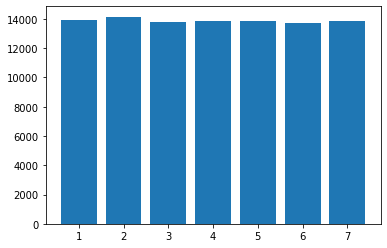

In [137]:
res=random_number7(100000)[1:]
print(res)

import matplotlib.pyplot as plt
%matplotlib inline
plt.bar([1,2,3,4,5,6,7],res)

### Q 2.3: Is normality uniform?

![normal and uniform distributions](https://qph.ec.quoracdn.net/main-qimg-f6ed71ed1d0059760fb63db384dcbcca-c)

Given draws from a normal distribution with known parameters, how can you simulate draws from a uniform distribution?

### Q 2.4: Should you pay or should you go?

![coin flip](https://lh5.ggpht.com/iwD6MnHeHVAXNBgrO7r4N9MQxxYi6wT9vb0Mqu905zTnNlBciONAA98BqafyjzC06Q=w300)

Let’s say we play a game where I keep flipping a coin until I get heads. If the first time I get heads is on the nth coin, then I pay you $2^{(n-1)}$ US dollars. How much would you pay me to play this game? Explain.

### Q 2.5: Uber vs. Lyft

![uber vs lyft](http://usiaffinity.typepad.com/.a/6a01347fc1cb08970c01bb0876bcbe970d-pi)

You request 2 UberX’s and 3 Lyfts. If the time that each takes to reach you is IID, what is the probability that all the Lyfts arrive first? What is the probability that all the UberX’s arrive first?

## 3 Conceptual ML

### Q 3.1 Why study gradient boosting or neural networks?

Consider a regression setting where $X \in \mathbb{R}^p$ and $Y \in \mathbb{R}$. The goal is to come up with a function $f(X): \mathbb{R}^p \rightarrow \mathbb{R}$ that minimizes the squared-error loss $(Y - f(X))^2$. Since X, Y are random variables, we seek to minimize the expectation of the squared error loss as follows
\begin{equation}
EPE(f) = \mathbb{E}\left[(Y-f(X)^2\right]
\end{equation}
where EPE stands for expected prediction error. One can show that minimizing the expected prediction error leads to the following _regression function_
\begin{equation}
f(x) = \mathbb{E}\left[Y|X=x\right]
\end{equation}

The goal of any method is to approximate the regression function above, which we denote as $\hat{f}(x)$. For example, linear regression explicitly assumes that the regression function is approximately linear in its arguments, i.e. $\hat{f}(x) = x^T\beta$ while a neural network provides a nonlinear approximation of the regression function. 

The simplest of all these methods is [k-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). Given $x$ and some neighbourhood of $k$ points $N_k(x)$, $\hat{f}(x)$ is simply the average of all $y_i|x_i \in N_k(x)$.  Let $N$ denote the training sample size. Under mild regularity conditions on the joint probability distribution $Pr(X, Y)$, one can show that as $N \rightarrow \infty$, $k \rightarrow \infty$ such that $k/N \rightarrow 0$, then $\hat{f}(x) \rightarrow f(x)$ where $\rightarrow$ means approaches or goes to. In other words, the k-nearest neighbors algorithm converges to the ideal solution as both the training sample size and number of neighbors increase to infinity.

Now given this _universal approximator_, why look any further and research other methods? Please share your thoughts.


**My Answer:**

k-nearest neighbors only have the ideal solution when both the training sample size and number of neighbors increase to infinity. Often we will set a number for k and this will lead some problems:
1. how to set k? KNN is highly dependant on the value of k. If k is large, the bias is high. But if k is small, the variance is high. And because k is integer, it is hard to reach a balance between bias and variance. For gradient boosting and neural networks, we can have multiple parameters to control the balance between bias and variance.
2. how to select k neighbors? if we only consider distance metrics, there are some other relationships that is omitted. It is possible that we have numeric mixed with some nominal features so we can not use distance metrics. For gradient boosting or neural networks, we can have numeric or nominal features.
3. how to predict the value from k neighbors? for k-nearest neighbors, we simply take the average of all $y_i|x_i \in N_k(x)$. It is possible that different k neighbors have different influence in prediction. For n neighbors, we may have one kind of impact, while for the other k-n neighbors, we have the other kind of impact. And there are some mutual influence in prediction. For k-nearest neighbors, we only have linear prediction. But for gradient booting or neural networks, we can have some nonlinear prediction.
4. Calculate k neighbors for each data point? to predict each data point, we need to calculate k nearest neighbors. Time complexity for this method is large. Having gradient boosting can reduce this time complexity.

### Q 3.2 Model Selection and Assesment

Consider a multiclass classification problem with a large number of features $p >> N$, for e.g $p=10000, N=100$ The task is threefold
1. Find a "good" subset of features that show strong _univariate_ correlation with class labels
2. Using the "good" subset, build a multi class classifier
3. Estimate the generalization error of the final model

Given this dataset, outline your approach and please be sure to cover the following
- Data splitting
- Model Selection: either estimating the performance of different classifiers or the same classifier with different hyperparameters
- Model Assessment: having chosen a classifier, estimating the generalization error

Assume all features are numerical, the dataset contains no NULLS, outliers, etc. and doesn't require any preprocessing.

